Importing Required Libraries

In [ ]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.decomposition import FastICA
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend. plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score

Importing the Dataset

In [ ]:
data=pd.read_csv("parkinsons.data")
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


#Pre-Processing

We need to drop the rows that have Null values

In [ ]:
data.dropna(inplace=True)

We find that the "name" column is not necessary and contributing to the data. Hence, we can drop it

In [ ]:
data.drop(columns=["name"],inplace=True)
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


We need to normalize the dataset in the range 0 to 1 for better working of most classifiers

In [ ]:
column_names=list(data.columns)
for i in column_names:
  data[i]=(data[i]-min(data[i]))/(max(data[i])-min(data[i]))
data

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,0.280197,...,0.332584,0.068307,0.511745,1.0,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310
1,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,0.444536,...,0.516048,0.059331,0.432577,1.0,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326
2,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,0.326212,...,0.443317,0.039596,0.496220,1.0,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682
3,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,0.354971,...,0.475478,0.040997,0.495936,1.0,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949
4,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,0.410025,...,0.584542,0.054174,0.455499,1.0,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.499820,0.262986,0.165722,0.092440,0.090909,0.093931,0.089496,0.094076,0.286014,0.262942,...,0.362306,0.085909,0.450134,0.0,0.447684,0.333127,0.257894,0.260408,0.549049,0.183318
191,0.705488,0.307974,0.138243,0.125794,0.090909,0.126686,0.107181,0.126826,0.164050,0.146261,...,0.221338,0.055543,0.435097,0.0,0.408567,0.434101,0.319956,0.276956,0.605474,0.257558
192,0.502730,0.281413,0.050727,0.378653,0.288538,0.267823,0.252947,0.267940,0.123608,0.140509,...,0.156631,0.338988,0.383728,0.0,0.352318,0.324299,0.212945,0.342577,0.558967,0.180580
193,0.642893,0.601807,0.054279,0.181703,0.130435,0.145472,0.159700,0.145288,0.122512,0.128184,...,0.155989,0.227838,0.429936,0.0,0.454176,0.277579,0.220650,0.452885,0.318222,0.163137


##Data Visualization

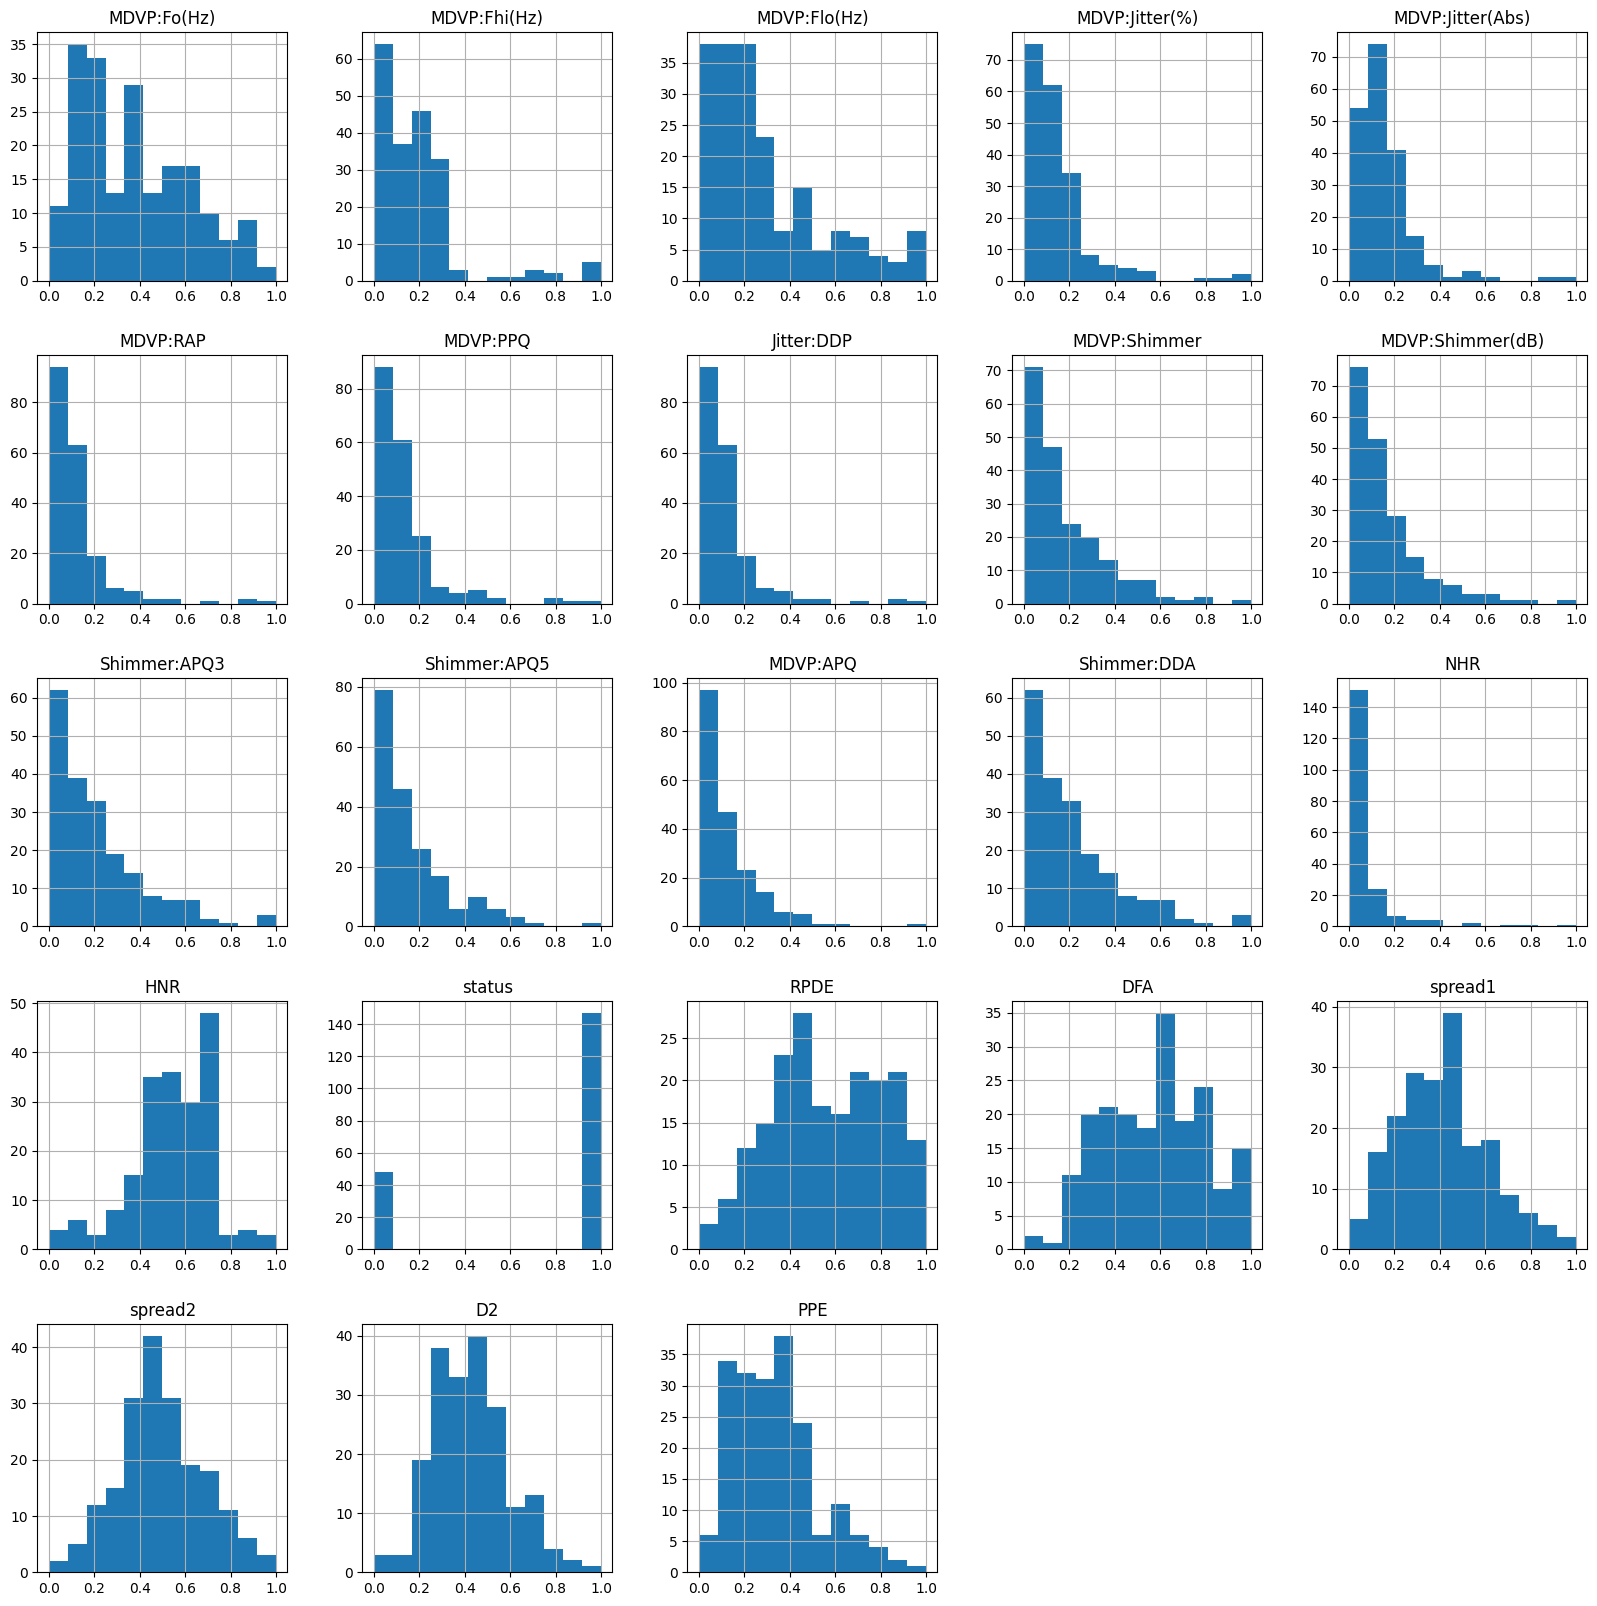

In [ ]:
hist_plots=data.hist(bins=12,figsize=(20,20))

##Heatmap for Visualizing Covariance

<Axes: >

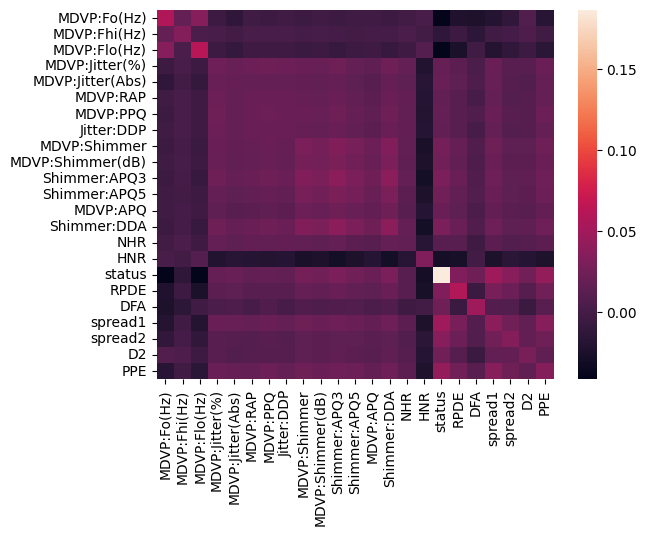

In [ ]:
covariance_matrix=data.cov()
sns.heatmap(covariance_matrix)

We can see that the covarince matrix shows that most of the features are almost statistically independent

**Converting given dataframe to numpy arrays**

In [ ]:
Y=data.status.to_numpy().astype(int)
X=data.drop(columns=["status"]).to_numpy()

**Train-Test Split**

Here, we are making a 80:20 Train:Test split

In [ ]:
x_train,x_test,y_train,y_test = tts(X,Y,test_size=0.2,stratify=Y,shuffle=True)

#LDA Classifier

Since it is a 2 class classification problem, we can use the LDA Classifier to obtain a dimension along which the datapoints are linearly separable.

In [ ]:
lda=LDA(n_components=1)
lda.fit(X,Y)
X_lda=lda.transform(X)
y_pred=lda.predict(X)
acc=accuracy_score(y_pred,Y)
print("The accuracy score for LDA Classifier is:", str(round(acc*100,2))+"%")

The accuracy score for LDA Classifier is: 91.79%


In [ ]:
#Code for Flattening the transformed dataset list

temp_1=[]
temp_2=[]
for i in X_lda:
  temp_1.append(i[0])
for i in X_lda:
  temp_2.append(i[0])
x_train_lda=temp_1
x_test_lda=temp_2

For the Decision Boundary, we have as follows:

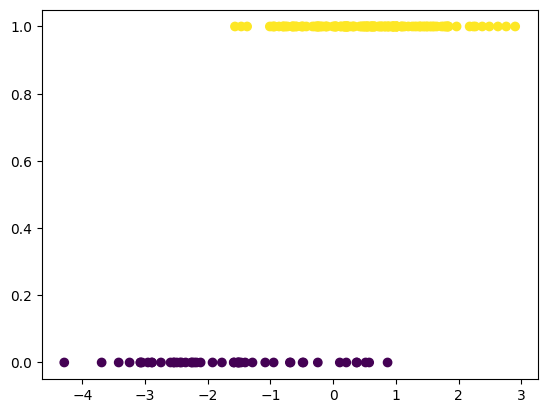

In [ ]:
new=plt.figure()
plt.scatter(X_lda,Y,c=Y)
plt.show()

Hence we find that the dataset is not completely linearly separable, Thus we also expect that a support vector machine with linear kernel will not give accurate results for this dataset.

##Dimensionality Reduction using PCA

In [ ]:
pca=PCA(n_components=4)
pca.fit(X)
X_pca=pca.transform(X)
x_train_pca,x_test_pca,y_train_pca,y_test_pca = tts(X_pca,Y,stratify=Y,test_size=0.2,shuffle=True)
print("The explained variance ratio for the 3 principal components is:", np.array(pca.explained_variance_ratio_)*100)

The explained variance ratio for the 3 principal components is: [50.26840744 16.3374157   9.38505212  5.47492598]


With 4 principal components, we can get a total explained variance ratio of 80%. This is good enough for classification and to avoid overfitting and to preserve the information in the data. Plotting them using 3-D plots, we have:

In [ ]:
df=pd.DataFrame(np.column_stack((X_pca,Y)),columns=["X1","X2","X3","X4","Y"])
plot=px.scatter_3d(df, x="X1", y="X2", z="X3", color="Y")
plot.show()

With this 3-d plot, we can see that there is separability in the data. Also, we can spot a few outliers. However, since all the outliers belong to the same class, we will not remove them.

However, we have also learnt that PCA is not the best dimensionality reduction technique in all the cases. Hence, we will also be using ICA with Naive Bayes Classifier and exploring Feature Selection.

##Independent Component Analysis with Naive Bayes

We are transforming the data to get 7 independent components.

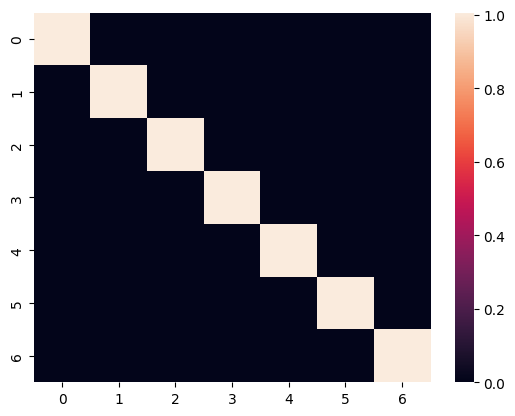

In [ ]:
ica=FastICA(n_components=7,max_iter=1000,whiten='unit-variance')
x_ica=ica.fit_transform(X)
ica_cov=np.cov(np.transpose(x_ica))
sns.heatmap(ica_cov)
x_ica_train,x_ica_test,y_ica_train,y_ica_test = tts(x_ica,Y,stratify=Y,test_size=0.2,shuffle=True)

With this heatmap of the covariance matrix, it becomes safe to say that the features are statistically independent

However, we expect the ICA to perform poorly no matter the classifier because the features in this dataset are not independent as they originate from the same audio files of the medical subjects.

Since most of the features were continuous, we can use Gaussian Naive Bayes as the features represented Natural Phenomena (Acoustic) which are known to follow Gaussian Distribution for n>=30 from Central Limit Theorem. Now, using the Naive Bayes Classifier, we have:

In [ ]:
gaussian_nb=GaussianNB()
gaussian_nb.fit(x_ica_train,y_train)
y_pred=gaussian_nb.predict(x_ica_test)
acc=accuracy_score(y_pred,y_test)
print("The accuracy for Gaussian Naive Bayes on the ICA dataset is:", str(round(100*acc,2))+"%")

The accuracy for Gaussian Naive Bayes on the ICA dataset is: 61.54%


We obtain a very bad accuracy for the Gaussian Naive Bayes Classification using ICA. Thus, we can say thaat Gaussian Naive Bayes along with ICA is not useful in the classifivation of this dataset. We could have also observed this from the histogram of the features noting that most of them did not follow a Gaussian Normal distribution.

##Sequential Forward Selection

For the Forward Feature Selection, we are using the Classifier Model as Decision Tree with max_depth=7 to avoid overfitting. We are also using the stopping/scoring parameter as accuracy as that is the most important in the given classification task. There are 22 features in total.

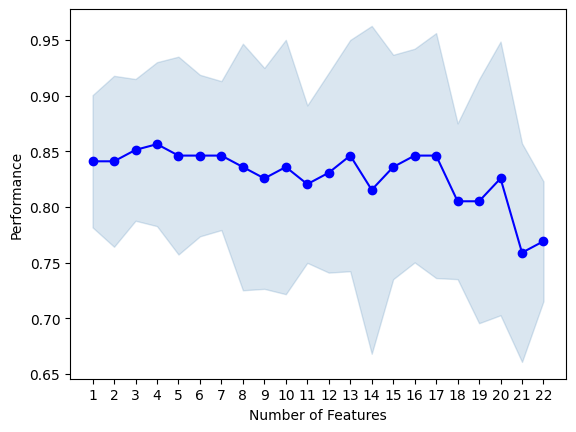

In [ ]:
model=DecisionTreeClassifier(max_depth=7)
sfs = SFS(model, k_features=22, forward=True, floating=False, scoring='accuracy')
sfs.fit(X,Y)
new=plot_sfs(sfs.get_metric_dict())

From the above, we can see that the optimum number of features to select would be 4. Hence we select the 4 best features

In [ ]:
feature_indices_selected = sfs.k_feature_idx_
X_sfs=X[:,feature_indices_selected[0]]
for i in range(1,4):
  X_sfs=np.column_stack((X_sfs,X[:,feature_indices_selected[i]]))
x_sfs_train,x_sfs_test,y_sfs_train,y_sfs_test = tts(X_sfs,Y,stratify=Y,test_size=0.2,shuffle=True)
print(np.shape(X_sfs))

(195, 4)


These 4 selected features are as follows:

In [ ]:
cols=list(data.columns)
feature_indices_selected = sfs.k_feature_idx_
x_features_to_keep = []
for index in feature_indices_selected:
  x_features_to_keep.append(cols[index])
print("These 4 best features are: ")
for i in range(4):
  print(str(i+1)+")",x_features_to_keep[i])

These 4 best features are: 
1) MDVP:Fo(Hz)
2) MDVP:Fhi(Hz)
3) MDVP:Flo(Hz)
4) MDVP:Jitter(%)


#Learning

##Naive Bayes Classifier

Applying the Naive Bayes Classifier on the PCA implemented data, we have:

In [ ]:
model=GaussianNB()
model.fit(x_train_pca,y_train)
y_pred=model.predict(x_test_pca)
acc=accuracy_score(y_pred,y_test_pca)
print("The accuracy for this model is:", str(round(100*acc,2))+"%")

The accuracy for this model is: 71.79%


We explore the distribution of data for this case.

(array([ 0.,  1., 22., 75., 18.,  1.,  1.]),
 array([-1.        , -0.71428571, -0.42857143, -0.14285714,  0.14285714,
         0.42857143,  0.71428571,  1.        ]),
 <BarContainer object of 7 artists>)

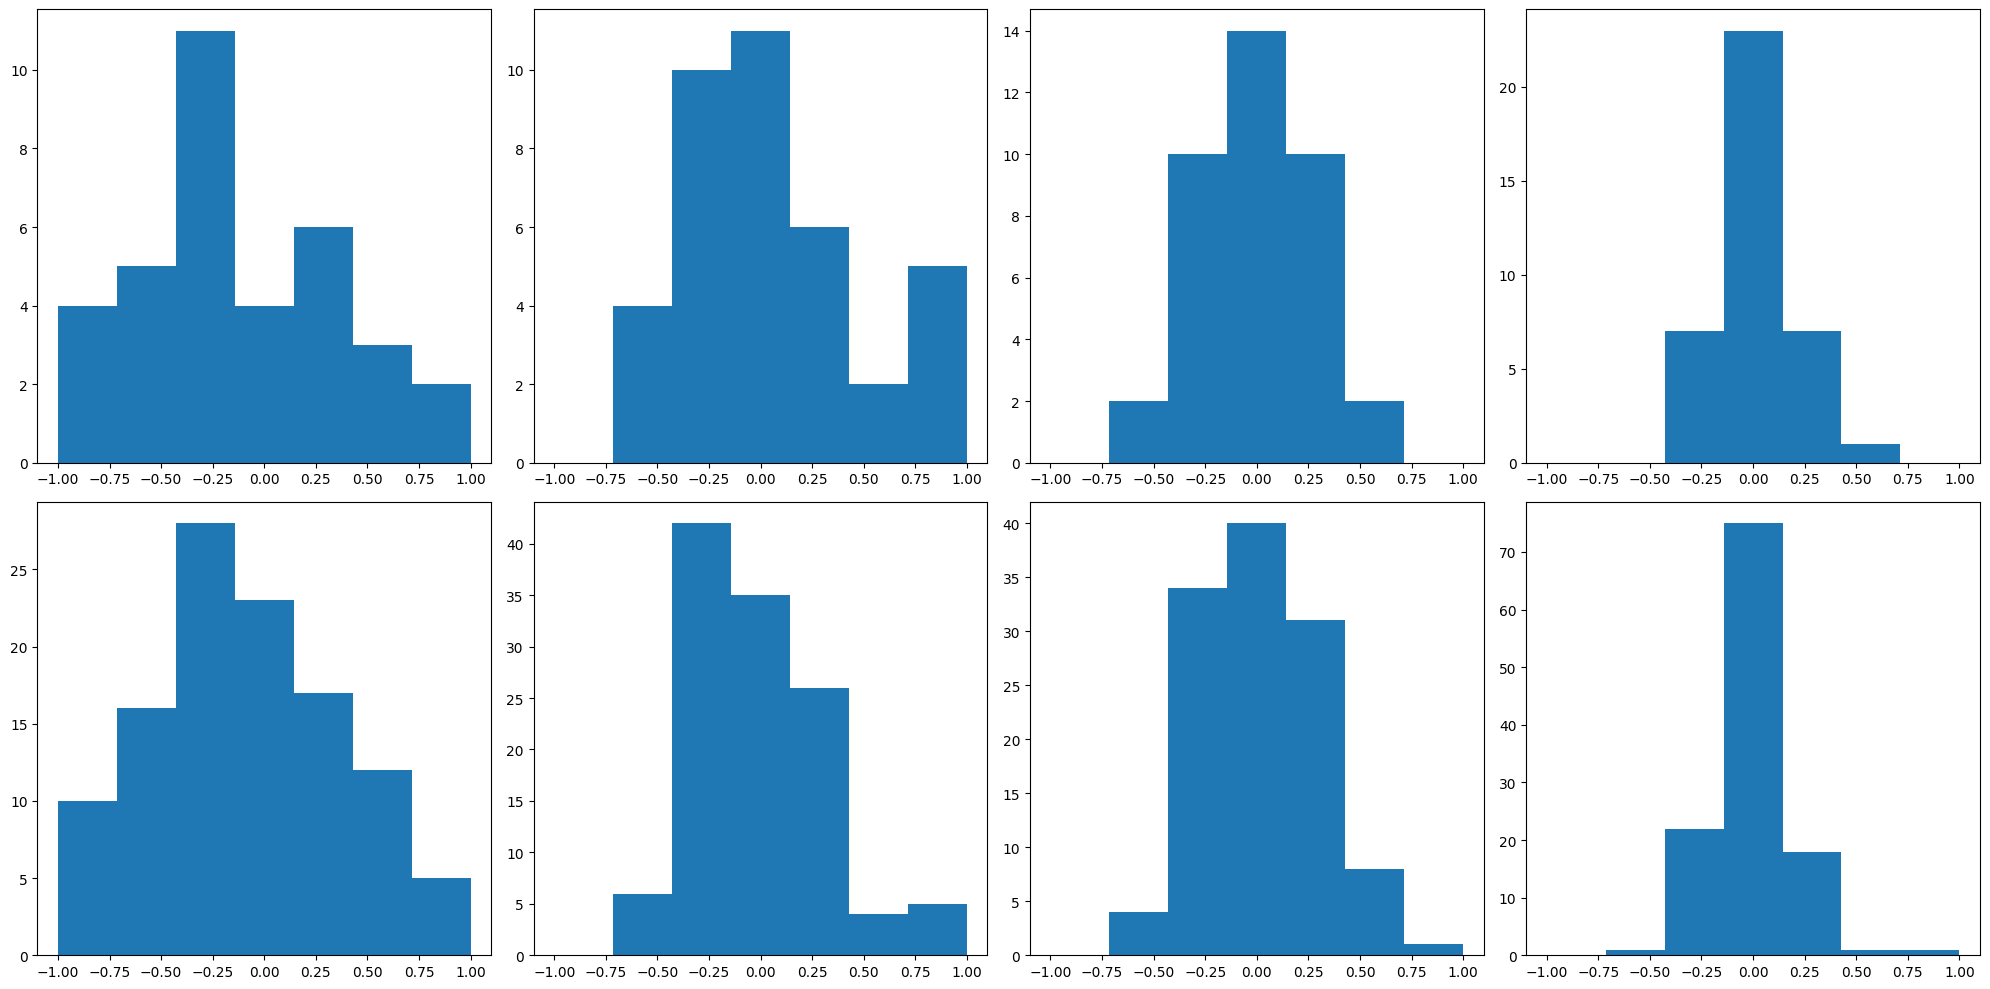

In [ ]:
x_train_class1=[]
x_train_class2=[]
for i in range(len(x_train_pca)):
  if y_train[i]==0:
    x_train_class1.append(x_train_pca[i])
  else:
    x_train_class2.append(x_train_pca[i])
x_train_class1=np.array(x_train_class1)
x_train_class2=np.array(x_train_class2)


fig, axs = plt.subplots(2, 4,figsize=(20,10), tight_layout=True)
axs[0][0].hist(x_train_class1[:,0],bins=7,range=[-1,1])
axs[1][0].hist(x_train_class2[:,0],bins=7,range=[-1,1])
axs[0][1].hist(x_train_class1[:,1],bins=7,range=[-1,1])
axs[1][1].hist(x_train_class2[:,1],bins=7,range=[-1,1])
axs[0][2].hist(x_train_class1[:,2],bins=7,range=[-1,1])
axs[1][2].hist(x_train_class2[:,2],bins=7,range=[-1,1])
axs[0][3].hist(x_train_class1[:,3],bins=7,range=[-1,1])
axs[1][3].hist(x_train_class2[:,3],bins=7,range=[-1,1])

The above plots in row 1 indicate the negative class while those in row 2 indicate the positive class.

With these histograms, we cann see that the distribution of PCA implemented dataset has 3 new features which follows a Gaussian (Bell-Shaped) distribution which is leptikertic

Implementing the Naive Bayes Classifier on the SFS features, we have

In [ ]:
model=GaussianNB()
model.fit(x_sfs_train,y_sfs_train)
y_pred=model.predict(x_sfs_test)
acc=accuracy_score(y_pred,y_sfs_test)
print("The accuracy for this model is:", str(round(100*acc,2))+"%")

The accuracy for this model is: 64.1%


Thus, we get a similar accuracy to that in the case of PCA with Naive Bayes

##Ensemble Learning

Since the dataset is highly biased, we now make use of Ensemble Learning in the form of a Random Decision Forest Classifier. Tuning the hyperparameter max_depth of this classifier, we get:

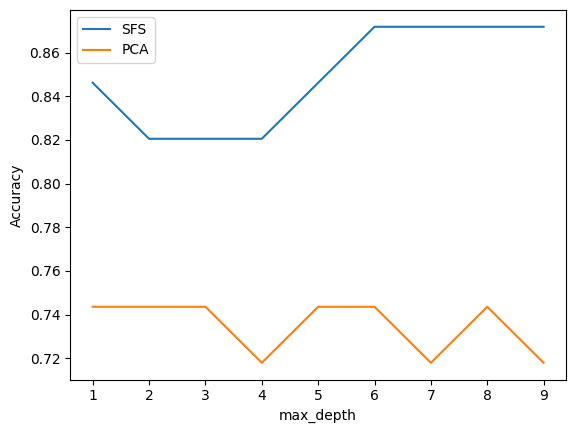

The accuracy is: 87.18%


In [198]:
acc_arr_sfs=[]
acc_arr_pca=[]

for i in range(1,10):
  model=RandomForestClassifier(max_depth=i)
  model.fit(x_sfs_train,y_sfs_train)
  y_sfs_pred=model.predict(x_sfs_test)
  acc=accuracy_score(y_sfs_pred,y_sfs_test)
  acc_arr_sfs.append(acc)

for i in range(1,10):
  model=RandomForestClassifier(max_depth=i)
  model.fit(x_train_pca,y_train)
  y_pca_pred=model.predict(x_test_pca)
  acc=accuracy_score(y_pca_pred,y_test_pca)
  acc_arr_pca.append(acc)

new=plt.figure()
plt.plot(range(1,10),acc_arr_sfs)
plt.plot(range(1,10),acc_arr_pca)
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend(["SFS","PCA"])
plt.show()

print("The accuracy is:", str(max(round(max(acc_arr_sfs)*100,2),round(max(acc_arr_pca)*100,2)))+"%")

From this, we note that increasing the max_depth of the decision trees improves the accuracy as it can accomodate more complex decision boundaries.We also do notice is that we get a considerably higher accuracy than in the case of other models in which bagging is not being used.

##Boosting

Boosting allows for combining many weak learners into a strong learner and to get a complex decision boundary. A weak learner is a learner which gives greater than 0.5 accuracy.

For applying Boosting on this data, we use XGBoost

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_sfs_train,y_sfs_train)
y_pred=xgb.predict(x_sfs_test)
acc=accuracy_score(y_pred,y_sfs_test)
print("The accuracy for XGBoost on SFS is:",str(round(acc*100,2))+"%")
print("The F1_Score for XGBoost on SFS is:",round(f1_score(y_pred,y_sfs_test),2))

xgb=XGBClassifier()
xgb.fit(x_train_pca,y_train)
y_pred=xgb.predict(x_test_pca)
acc=accuracy_score(y_pred,y_test_pca)
print("The accuracy for XGBoost on PCA is:",str(round(acc*100,2))+"%")

The accuracy for XGBoost on SFS is: 87.18%
The F1_Score for XGBoost on SFS is: 0.92
The accuracy for XGBoost on PCA is: 64.1%


Here, we see that with Boosting, we obtain a very high F1 score as well as a high accuracy with the SFS implemented data. Thus, XGBoost performs very well with SFS on the given dataset

##KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_sfs_train,y_sfs_train)
y_pred=knn.predict(x_sfs_test)
acc=accuracy_score(y_pred,y_sfs_test)
print("The accuracy of KNN with SFS is:", str(round(100*acc,2))+"%")

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_pca,y_train_pca)
y_pred=knn.predict(x_test_pca)
acc=accuracy_score(y_pred,y_test_pca)
print("The accuracy of KNN with PCA is:", str(round(100*acc,2))+"%")
print("The F1 score of KNN with PCA is:", f1_score(y_pred,y_test_pca))

The accuracy of KNN with SFS is: 87.18%
The accuracy of KNN with PCA is: 97.44%
The F1 score of KNN with PCA is: 0.983050847457627


We note here that KNN performs very well in the given dataset especially eith PCA because of the low intra-class distances that we have observed from the 3-D plot of the PCA implemented data points. KNN is also a good method in this case as it is a rare disease and we have very less training data that needs to be carried with the learnt model hence not much memory is needed. We also obtain a high f1 score of 0.97 in this case which is very good considering it is a disease classificaton task.

##SVM

In [ ]:
svm_kernels=['linear', 'sigmoid', 'poly', 'rbf']
for i in svm_kernels:
  model=SVC(kernel=i)
  model.fit(x_train_pca,y_train_pca)
  y_pred=model.predict(x_test_pca)
  acc=accuracy_score(y_test_pca,y_pred)
  print("The accuracy for Kernel",i, "SVM with PCA is:",str(100*acc)+"%")

svm_kernels=['linear', 'sigmoid', 'poly', 'rbf']
for i in svm_kernels:
  model=SVC(kernel=i)
  model.fit(x_sfs_train,y_sfs_train)
  y_pred=model.predict(x_sfs_test)
  acc=accuracy_score(y_sfs_test,y_pred)
  print("The accuracy for Kernel",i, "SVM with SFS is:",str(100*acc)+"%")

The accuracy for Kernel linear SVM with PCA is: 82.05128205128204%
The accuracy for Kernel sigmoid SVM with PCA is: 69.23076923076923%
The accuracy for Kernel poly SVM with PCA is: 84.61538461538461%
The accuracy for Kernel rbf SVM with PCA is: 82.05128205128204%
The accuracy for Kernel linear SVM with SFS is: 74.35897435897436%
The accuracy for Kernel sigmoid SVM with SFS is: 71.7948717948718%
The accuracy for Kernel poly SVM with SFS is: 82.05128205128204%
The accuracy for Kernel rbf SVM with SFS is: 82.05128205128204%


We see that None of the SVM kernels are able to provide as good a classification accuracy either with PCA or SFS.

##Multi-Layer Perceptron

We are applying MLP because of its versatility due to the fact that a 3 layered MLP can approximate any arbitrary continuous decision boundary.

In [200]:
nn=MLPClassifier(max_iter=10000)
nn.fit(x_sfs_train,y_sfs_train)
y_pred=nn.predict(x_sfs_test)
acc=accuracy_score(y_pred,y_sfs_test)
print("The accuracy for MLP on SFS data is:", str(round(100*acc,2))+"%")
print("The F1_Score for MLP on SFS data is:", f1_score(y_pred,y_sfs_test))

nn=MLPClassifier(max_iter=10000)
nn.fit(x_train_pca,y_train_pca)
y_pred=nn.predict(x_test_pca)
acc=accuracy_score(y_pred,y_test_pca)
print("The accuracy for MLP on PCA data is:", str(round(100*acc,2))+"%")
print("The F1_Score for MLP on PCA data is:", f1_score(y_pred,y_test_pca))

The accuracy for MLP on SFS data is: 74.36%
The F1_Score for MLP on SFS data is: 0.8333333333333334
The accuracy for MLP on PCA data is: 87.18%
The F1_Score for MLP on PCA data is: 0.9180327868852458


We are unable to obtain a very high accuracy with MLP because of the fact that there are not many points in the dataset which can be used for training.